# <center> *Project - Customer Segmentation*

## Overall Approach
1. Retrieve information about the data for observation.
2. EDA.
3. Performing Encoding and Scaling on Features.
4. PCA.
5. Agglomerative clustering.
6. DB Scan.

### Importing Libraries

In [1]:
# Base libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline 

# For max displays
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing   import StandardScaler, normalize
from sklearn.preprocessing   import MinMaxScaler

# Building Models
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.decomposition import PCA

#### Read the data using pandas from .csv file

In [2]:
df = pd.read_csv('CC GENERAL.csv',encoding='latin1')

#### Check first few rows

In [3]:
df.head(10)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   
5  C10006  1809.828751           1.000000    1333.28              0.00   
6  C10007   627.260806           1.000000    7091.01           6402.63   
7  C10008  1823.652743           1.000000     436.20              0.00   
8  C10009  1014.926473           1.000000     861.49            661.49   
9  C10010   152.225975           0.545455    1281.60           1281.60   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   95.40      0.000000             0.166667   
1                    0.00   6442.945483             0.000000   
2                    0.00      0.000000             1.000000   
3                    0.00    205.788017             0.083333   
4                    0.00      0.000000             0.083333   
5                 1333.28      0.000000             0.666667   
6                  688.38      0.000000             1.000000   
7                  436.20      0.000000             1.000000   
8                  200.00      0.000000             0.333333   
9                    0.00      0.000000             0.166667   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   
5                    0.000000                          0.583333   
6                    1.000000                          1.000000   
7                    0.000000                          1.000000   
8                    0.083333                          0.250000   
9                    0.166667                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   
5                0.000000                 0              8        1800.0   
6                0.000000                 0             64       13500.0   
7                0.000000                 0             12        2300.0   
8                0.000000                 0              5        7000.0   
9                0.000000                 0              3       11000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12  
5  1400.057770       2407.246035          0.000000      12  
6  6354.314328        198.065894          1.000000      12  
7   679.065082        532.033990          0.000000      12  
8   688.278568        311.963409          0.000000      12  
9  1164.770591        100.302262          0.000000      12

#### Check the shape and columns of the dataset

In [4]:
df.shape

(8950, 18)

In [5]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### Check dtypes, null values of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

#### Check duplicate

In [8]:
df.duplicated().sum()

0

#### Drop CUST_ID column

In [9]:
df.drop('CUST_ID', axis = 1, inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

#### Handling Null value - Replacing null in MINIMUM_PAYMENTS to zeroes

In [11]:
df.query('MINIMUM_PAYMENTS == "NaN"')
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(0)

In [12]:
df.query('CREDIT_LIMIT == "NAN"')

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

#### Drop row containing null value in CUST_ID

In [13]:
df = df.dropna(subset=['CREDIT_LIMIT'])

In [14]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [15]:
df.shape

(8949, 17)

In [16]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8949.000000        8949.000000   8949.000000       8949.000000   
mean    1564.647593           0.877350   1003.316936        592.503572   
std     2081.584016           0.236798   2136.727848       1659.968851   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.365782           0.888889     39.800000          0.000000   
50%      873.680279           1.000000    361.490000         38.000000   
75%     2054.372848           1.000000   1110.170000        577.830000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8949.000000   8949.000000          8949.000000   
mean               411.113579    978.959616             0.490405   
std                904.378205   2097.264344             0.401360   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.650000   1113.868654             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8949.000000                       8949.000000   
mean                     0.202480                          0.364478   
std                      0.298345                          0.397451   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8949.000000       8949.000000    8949.000000   8949.000000   
mean                 0.135141          3.249078      14.711476   4494.449450   
std                  0.200132          6.824987      24.858552   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8949.000000       8949.000000       8949.000000  8949.000000  
mean    1733.336511        834.075035          0.153732    11.517935  
std     2895.168146       2336.104378          0.292511     1.337134  
min        0.000000          0.000000          0.000000     6.000000  
25%      383.282850        163.029483          0.000000    12.000000  
50%      857.062706        289.686899          0.000000    12.000000  
75%     1901.279320        788.721609          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [17]:
df.skew()

BALANCE                              2.393270
BALANCE_FREQUENCY                   -2.024193
PURCHASES                            8.143969
ONEOFF_PURCHASES                    10.044622
INSTALLMENTS_PURCHASES               7.298823
CASH_ADVANCE                         5.166323
PURCHASES_FREQUENCY                  0.059970
ONEOFF_PURCHASES_FREQUENCY           1.535453
PURCHASES_INSTALLMENTS_FREQUENCY     0.509023
CASH_ADVANCE_FREQUENCY               1.828644
CASH_ADVANCE_TRX                     5.720976
PURCHASES_TRX                        4.630493
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907465
MINIMUM_PAYMENTS                    13.807831
PRC_FULL_PAYMENT                     1.942641
TENURE                              -2.944788
dtype: float64

### HeatMap

<AxesSubplot:>

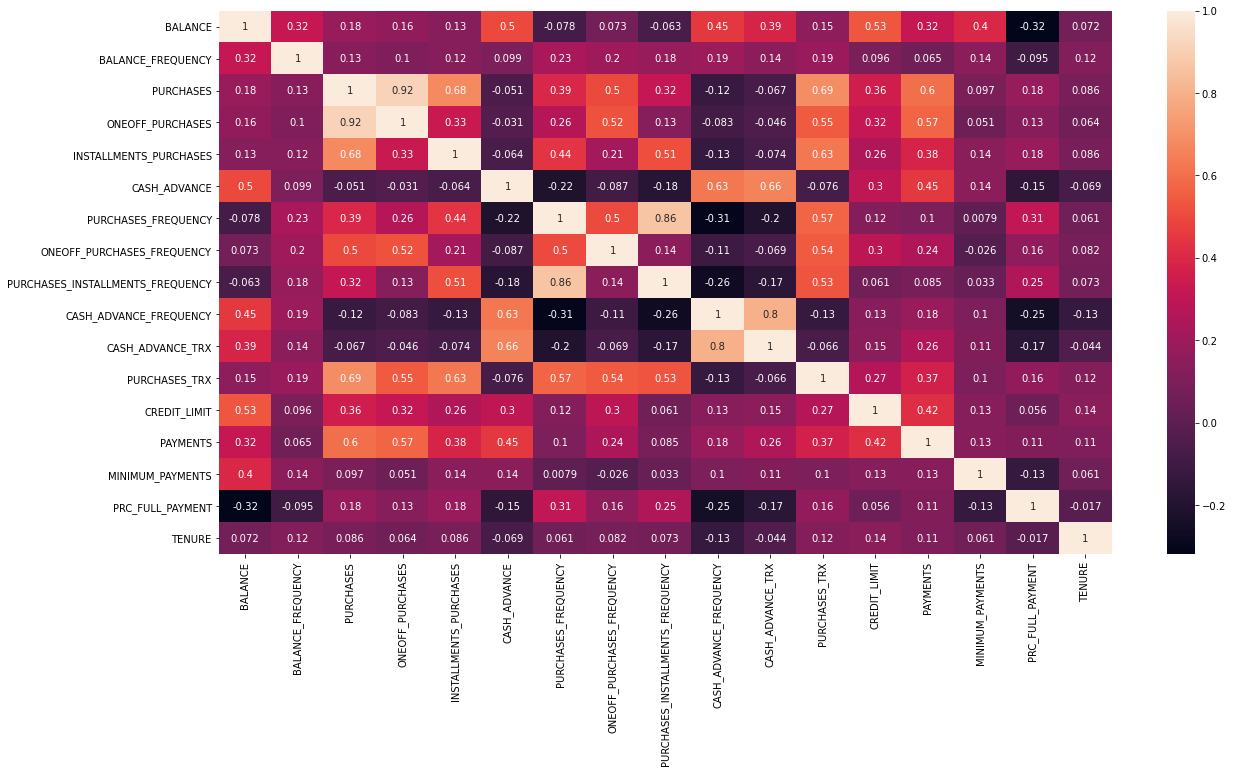

In [18]:
plt.figure(figsize=(20, 10))
correlation = df.corr()
sns.heatmap(correlation,xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True,)

### Pairplot

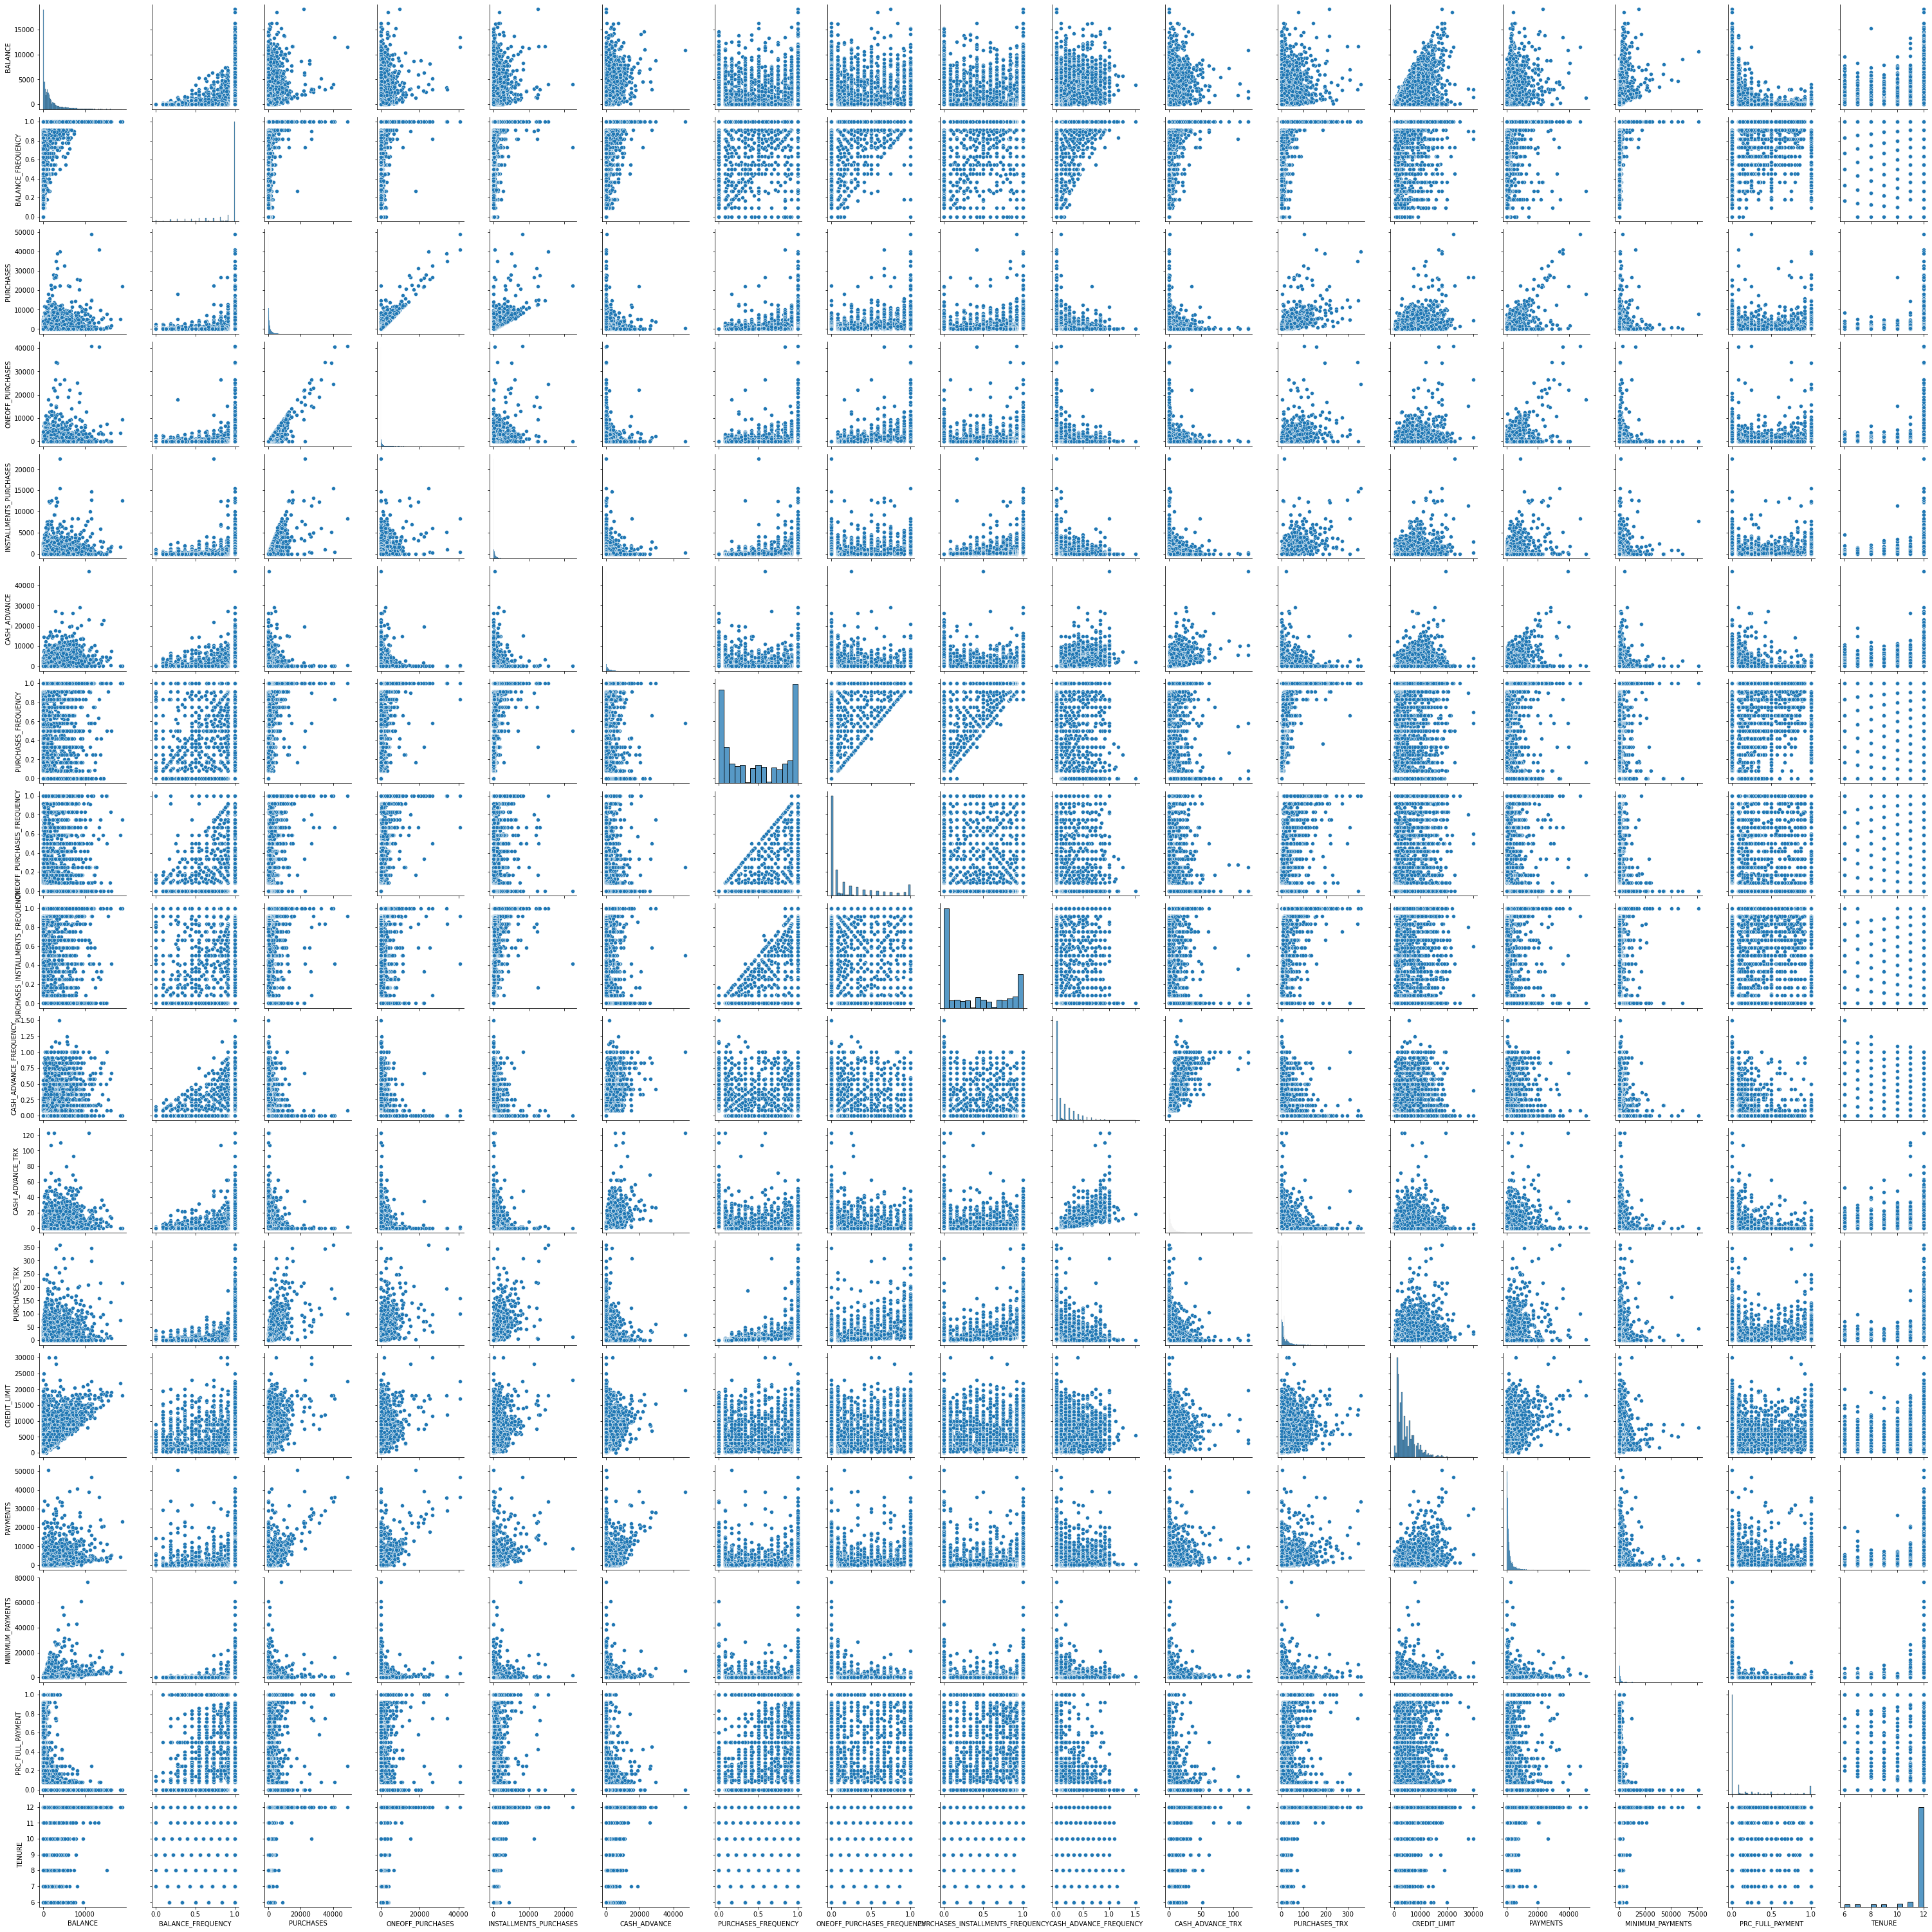

In [19]:
sns.pairplot(df)

### Histogram

array([[<AxesSubplot:title={'center':'BALANCE'}>,
        <AxesSubplot:title={'center':'BALANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'PURCHASES'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES'}>],
       [<AxesSubplot:title={'center':'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE'}>,
        <AxesSubplot:title={'center':'PURCHASES_FREQUENCY'}>,
        <AxesSubplot:title={'center':'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot:title={'center':'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot:title={'center':'CASH_ADVANCE_TRX'}>,
        <AxesSubplot:title={'center':'PURCHASES_TRX'}>],
       [<AxesSubplot:title={'center':'CREDIT_LIMIT'}>,
        <AxesSubplot:title={'center':'PAYMENTS'}>,
        <AxesSubplot:title={'center':'MINIMUM_PAYMENTS'}>,
        <AxesSubplot:title={'center':'PRC_FULL_PAYMENT'}>],
       [<AxesSubplot:title={'center':'TENURE'

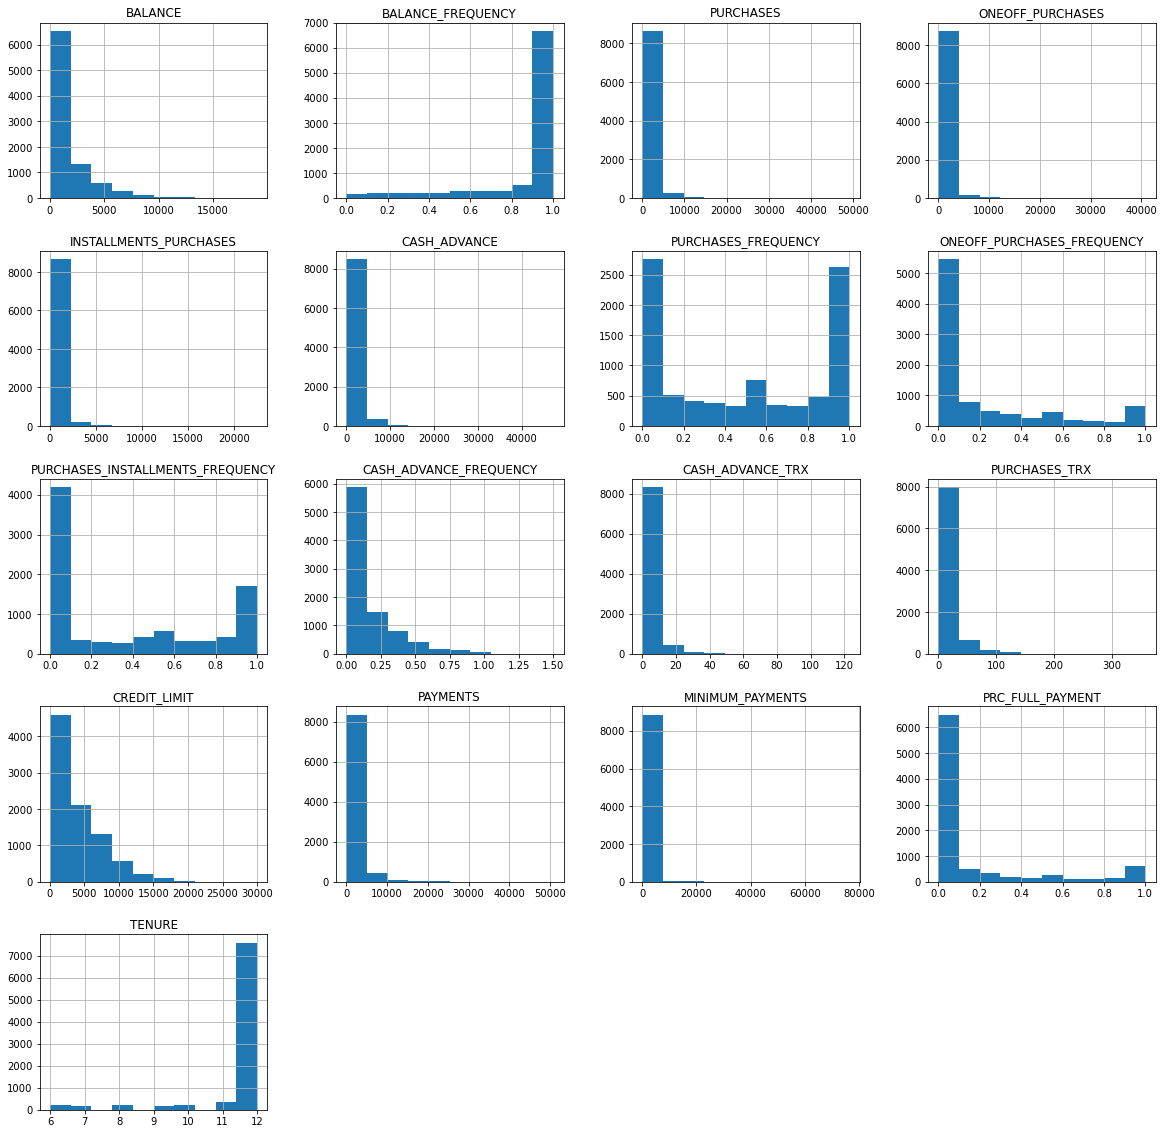

In [20]:
df.hist(figsize=(20,20))

### Scaling

In [21]:
sc = StandardScaler()
df_scale = sc.fit_transform(df)
df_normalize = normalize(df_scale)

### PRINCIPAL COMPONENT ANALYSIS

In [22]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_normalize)
df_pca = pd.DataFrame(df_pca)
df_pca.columns = ['PC1','PC2']

In [23]:
df_pca

PC1       PC2
0    -0.490773 -0.679091
1    -0.518564  0.545272
2     0.330870  0.269060
3    -0.475751 -0.112097
4    -0.564178 -0.480551
...        ...       ...
8944  0.328439 -0.198200
8945  0.259465 -0.177112
8946  0.188576 -0.248232
8947 -0.312968 -0.171021
8948  0.012892  0.097363

[8949 rows x 2 columns]

In [24]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.28414493 0.18008078]
[0.29045227 0.18407815]
[0.29045227 0.47453042]


### Agglomerative clustering

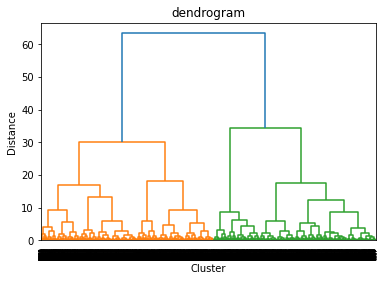

In [25]:
dendrogram= sch.dendrogram(sch.linkage(df_pca, method = "ward"))
plt.title('dendrogram')
plt.xlabel('Cluster')
plt.ylabel('Distance')
plt.show()

In [26]:
def cluster(cluster, distance, linkage):
    aggclust = AgglomerativeClustering(n_clusters=cluster,affinity=distance, linkage=linkage)

    plt.figure(figsize =(8, 8))
    plt.scatter(df_pca['PC1'], df_pca['PC2'], c = aggclust.fit_predict(df_pca), cmap ='rainbow')
    plt.title("Agglomerative Hierarchical Clusters for 2 ,3, 4, 5"  + "-" + distance + " " + linkage , fontsize=18)
    plt.show()
    
    return silhouette_score(df_pca, aggclust.fit_predict(df_pca))

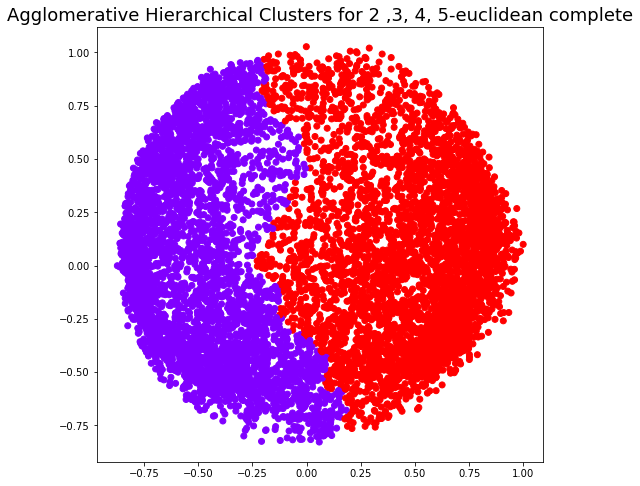

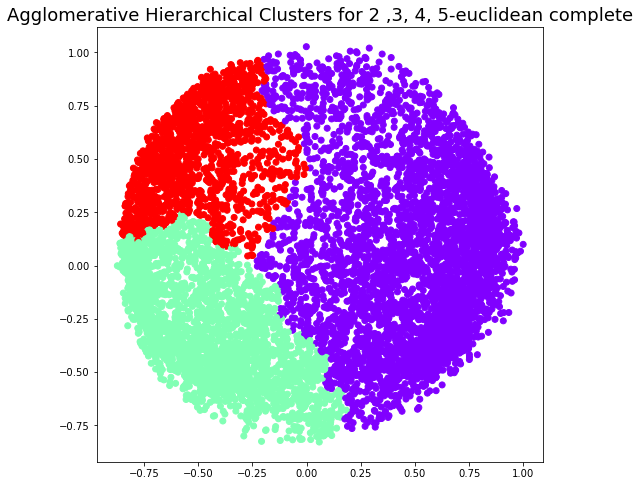

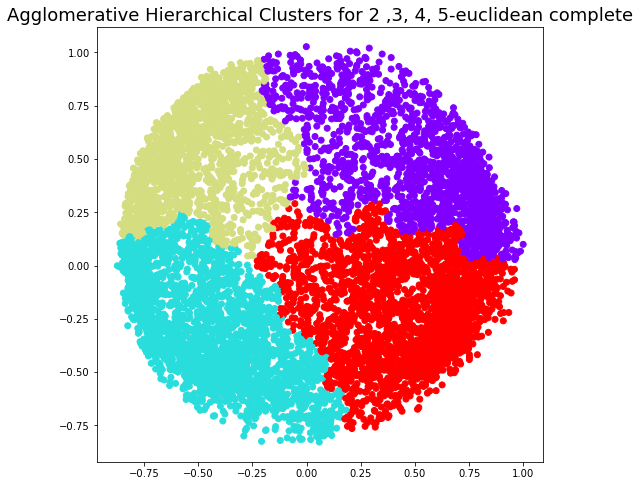

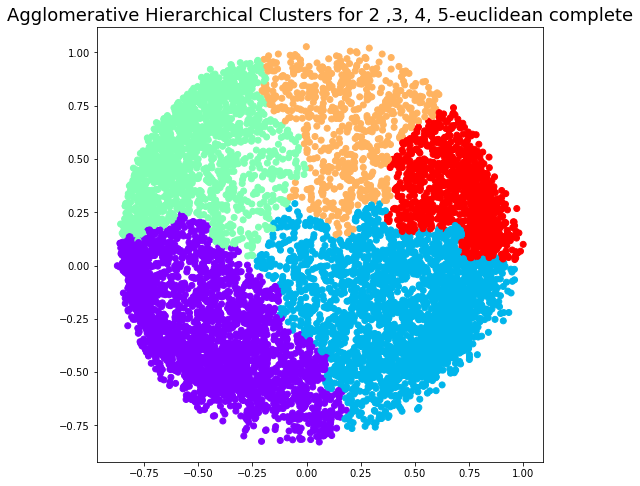

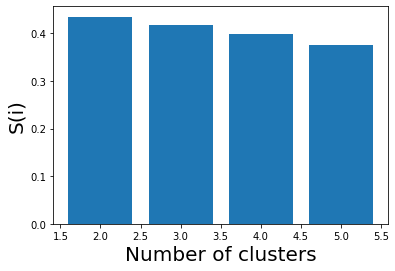

Silhouette score for 2,3,4,5 [0.435246602382844, 0.4186813374024975, 0.3985488969245039, 0.37610630428738107]


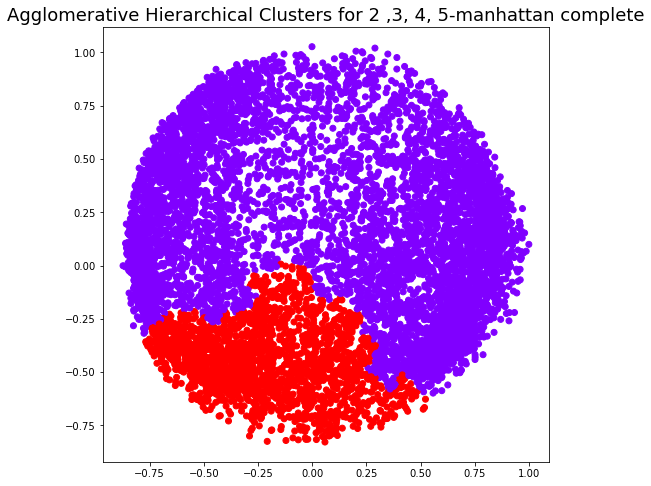

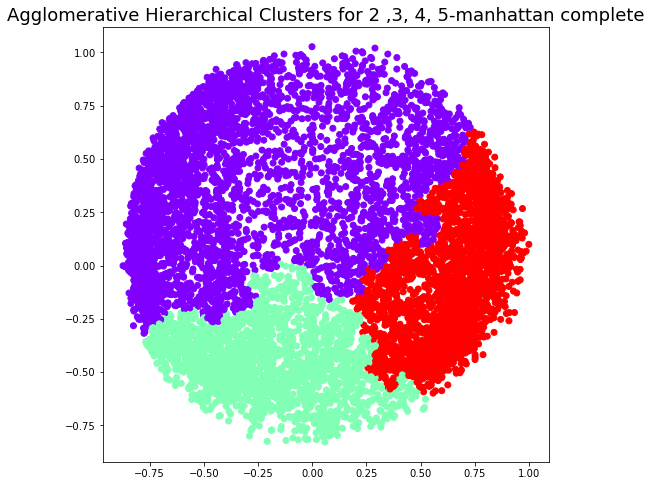

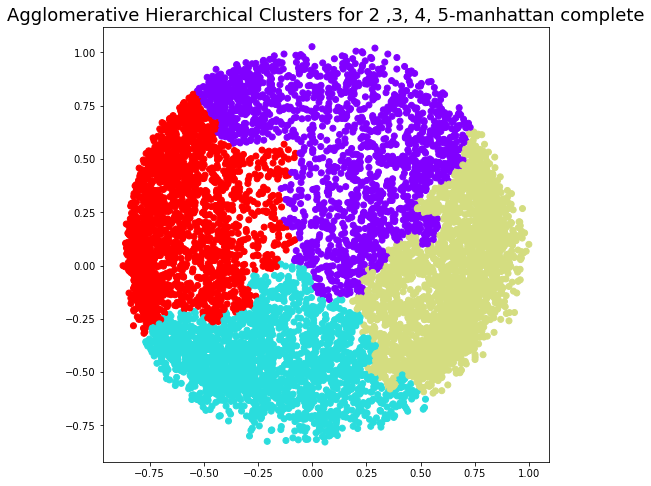

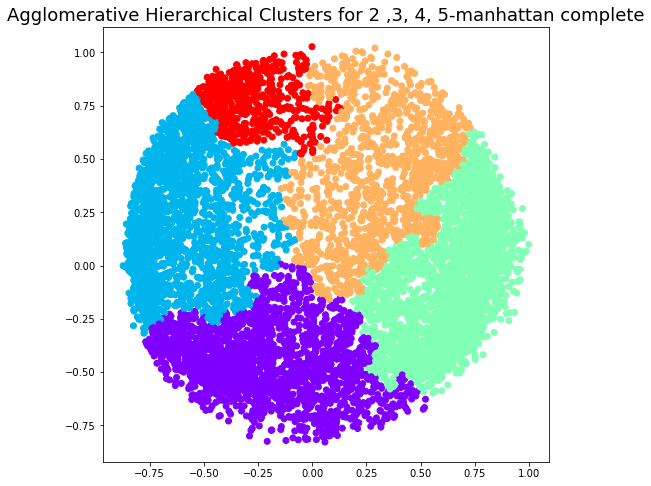

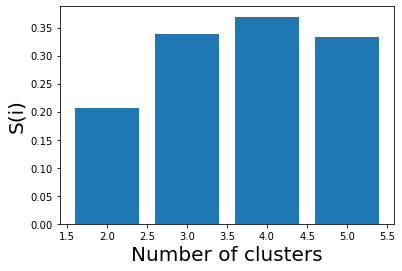

Silhouette score for 2,3,4,5 [0.20631781922651748, 0.33802653567234703, 0.3692459471498193, 0.3333513994497215]


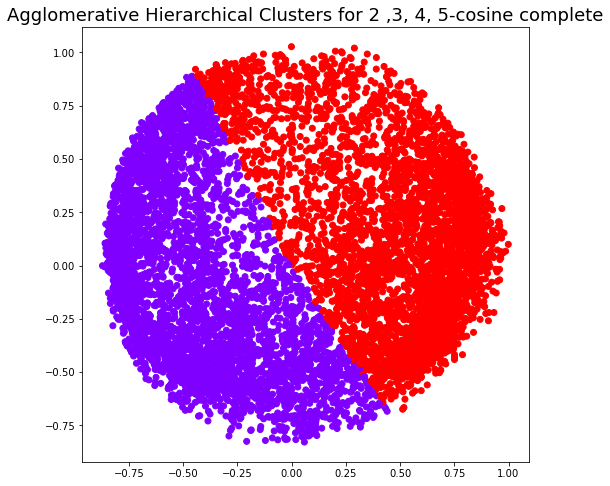

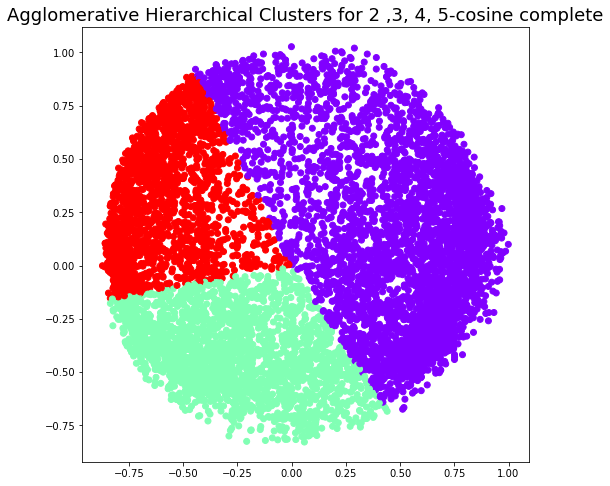

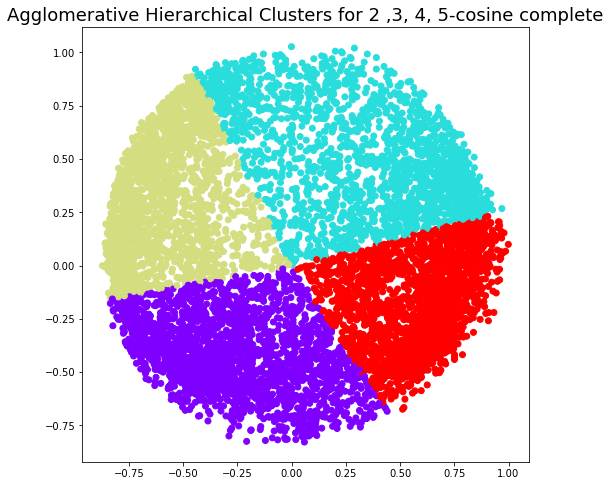

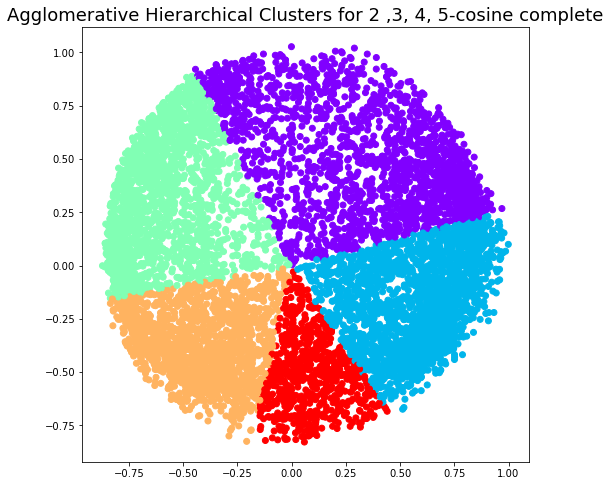

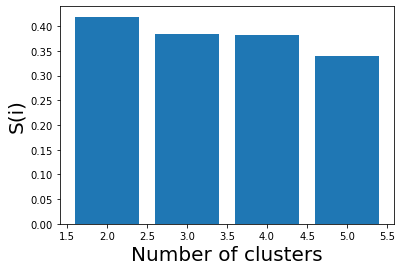

Silhouette score for 2,3,4,5 [0.41920974966941726, 0.3843446286727728, 0.3827341182118925, 0.3389826658013116]


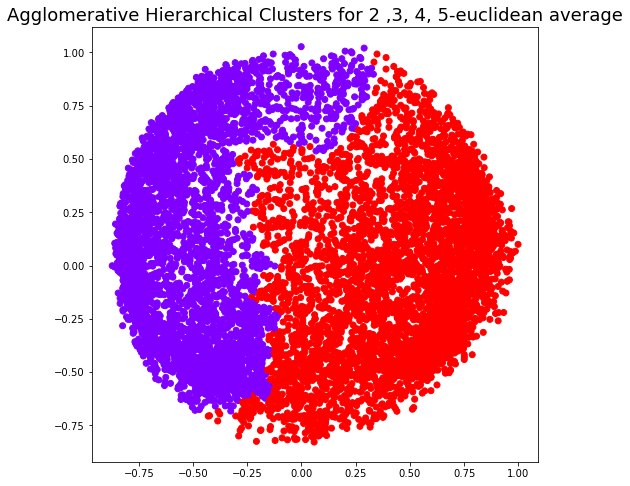

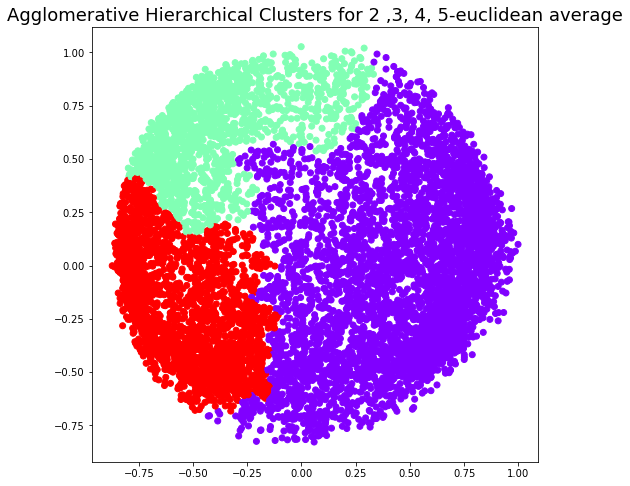

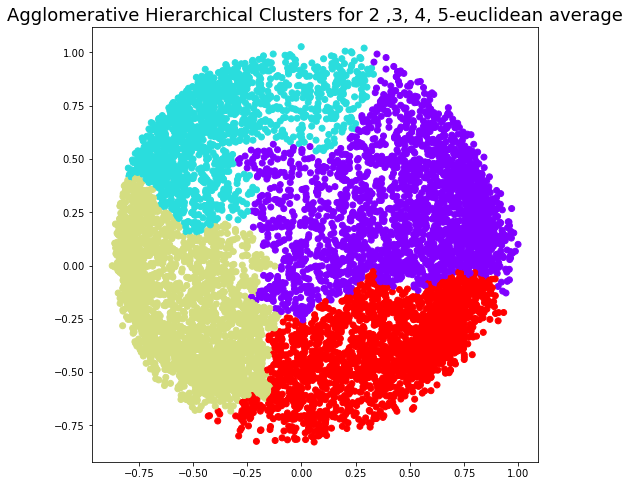

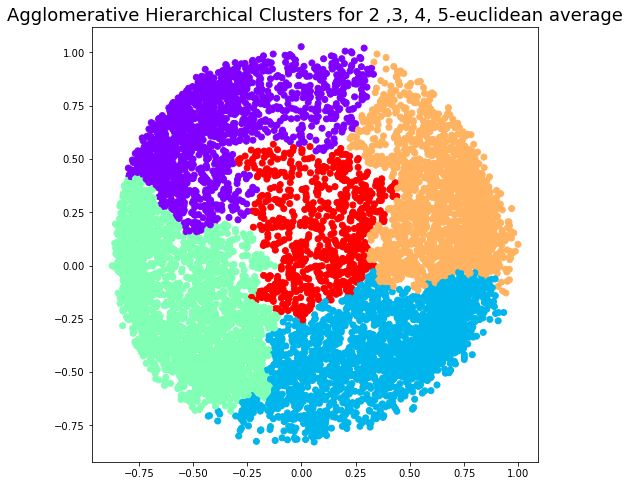

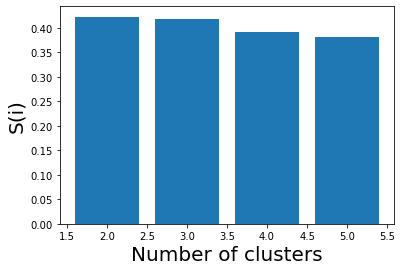

Silhouette score for 2,3,4,5 [0.4228204844826766, 0.4173801076506027, 0.3910517628138639, 0.38137580096731516]


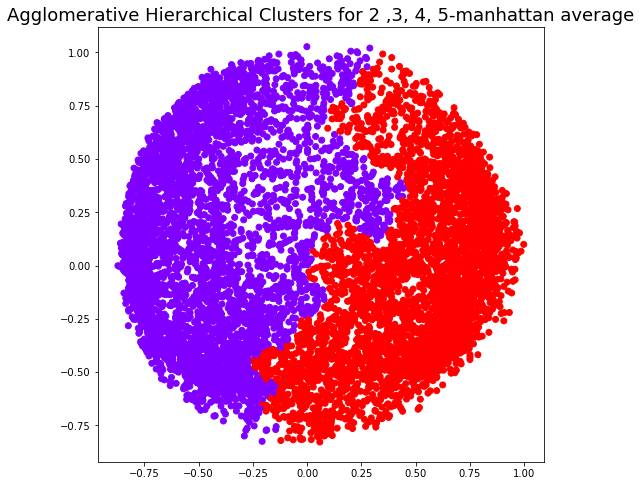

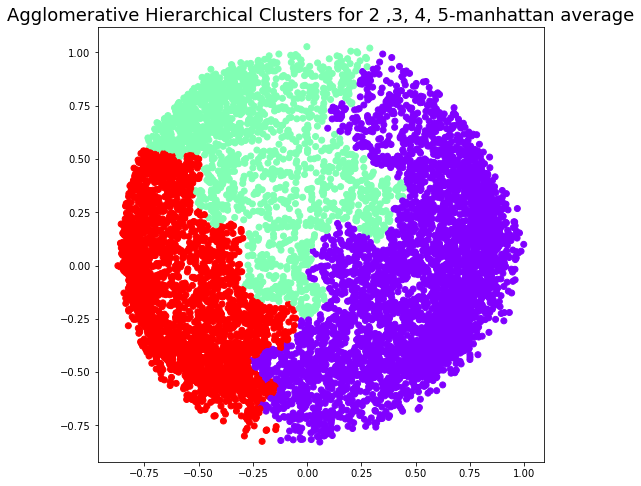

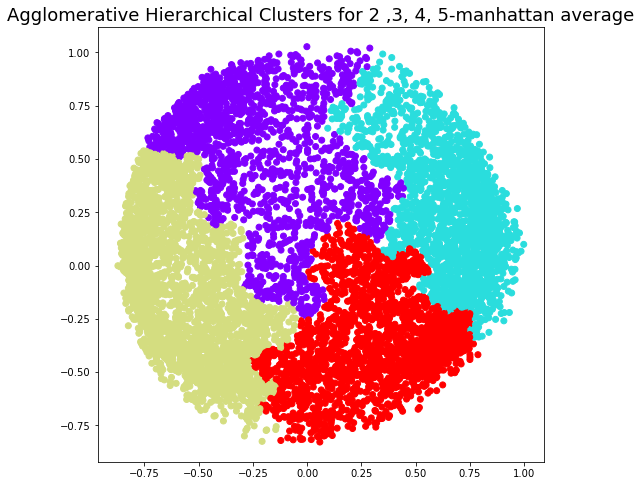

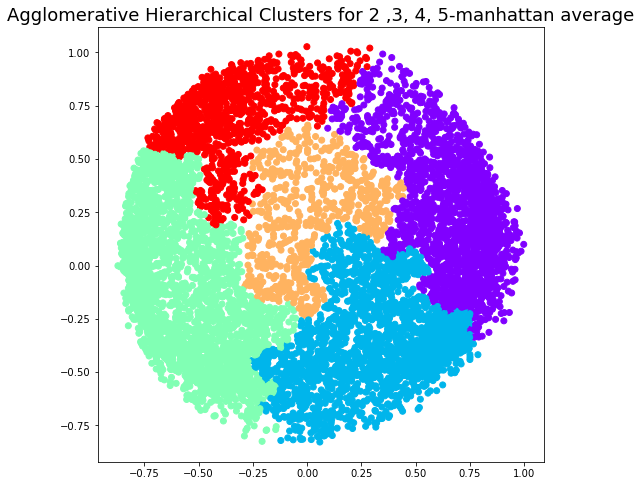

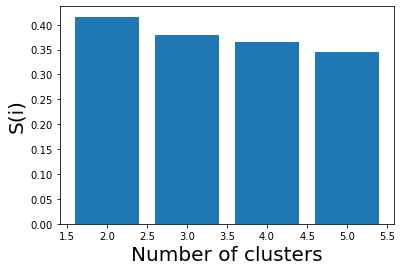

Silhouette score for 2,3,4,5 [0.4161013745514671, 0.3798283412067979, 0.3660072114069437, 0.34600306335224457]


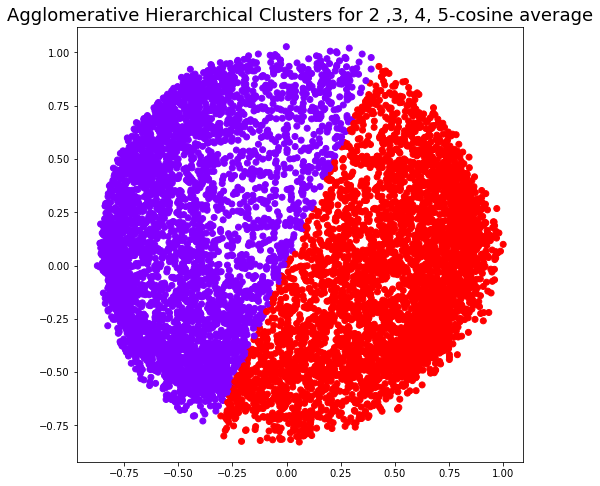

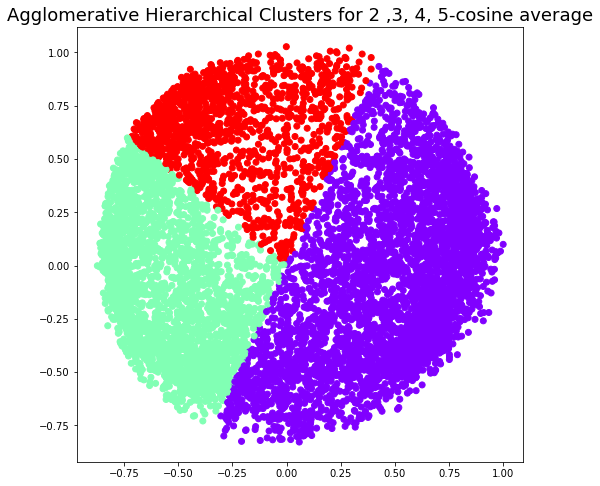

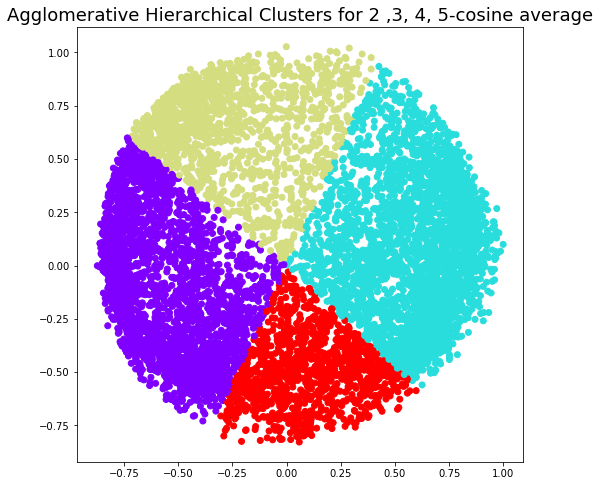

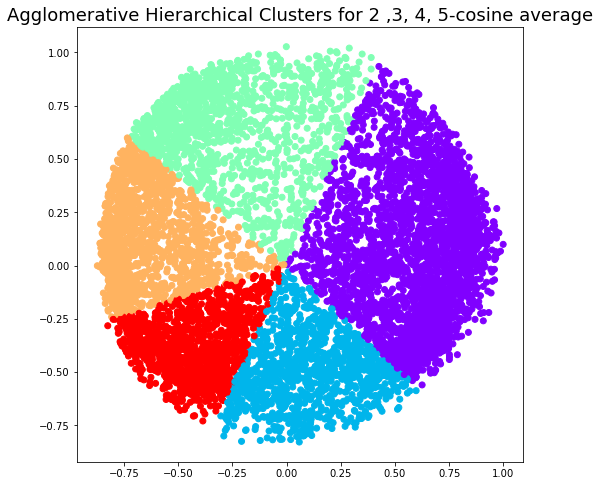

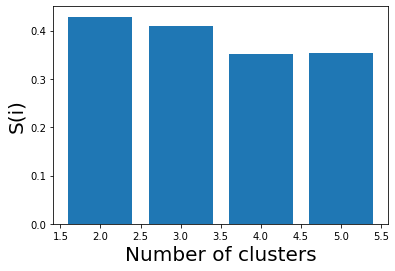

Silhouette score for 2,3,4,5 [0.4287861701540688, 0.40970483037995764, 0.3515698294743413, 0.3533780422707038]


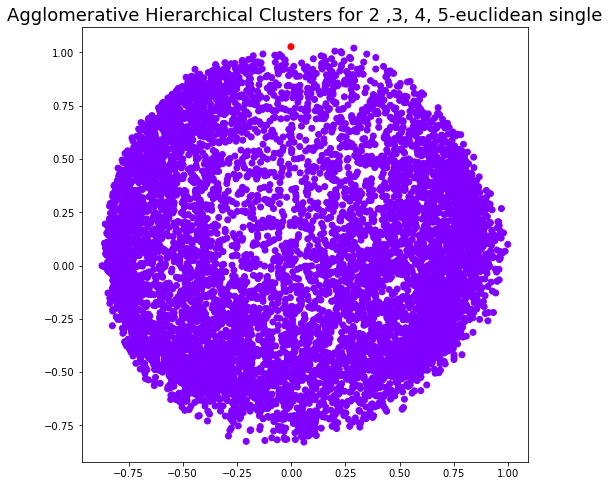

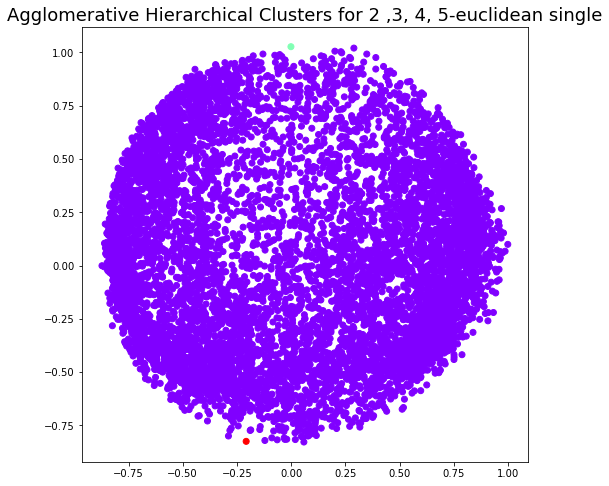

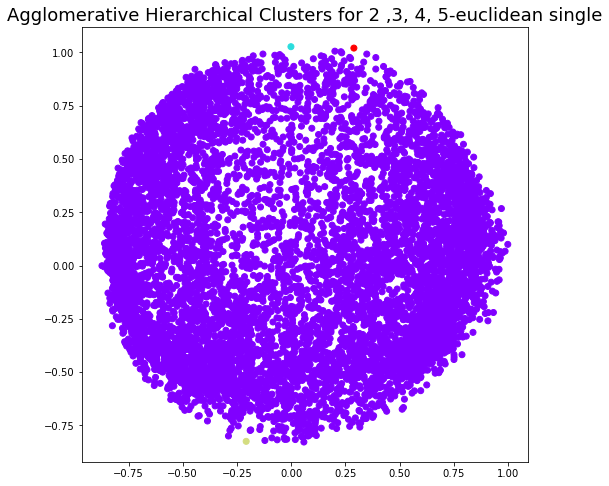

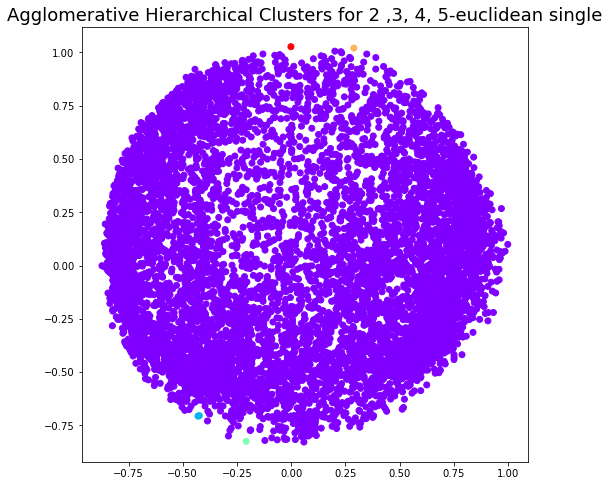

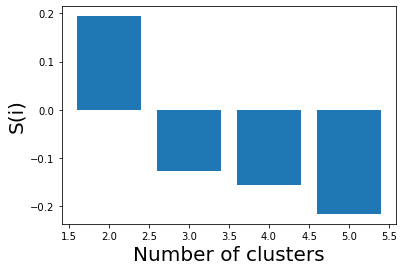

Silhouette score for 2,3,4,5 [0.1942264355772353, -0.12726321213941025, -0.1569646530754337, -0.21617730156610546]


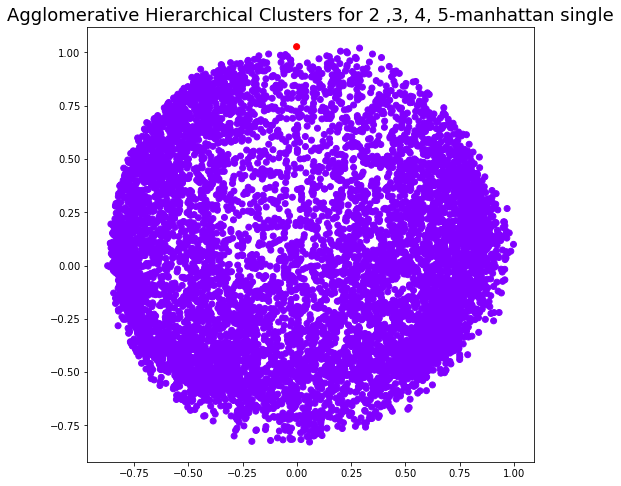

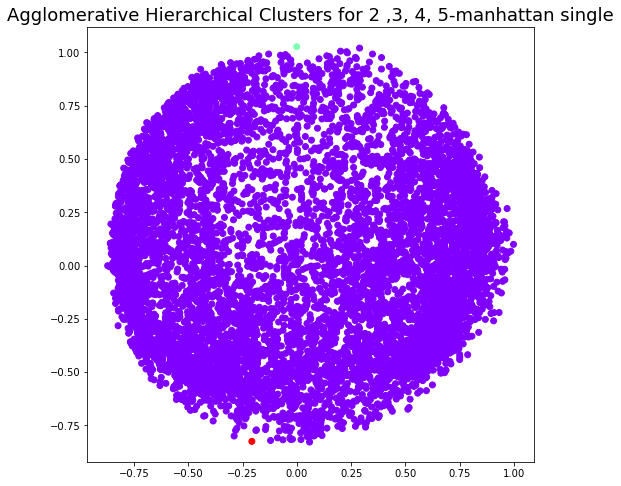

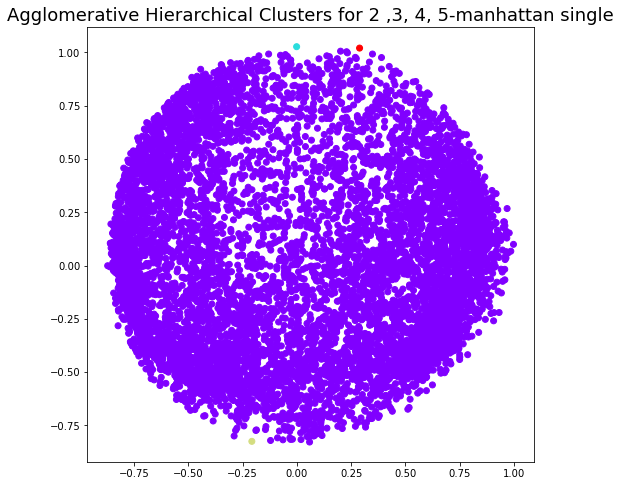

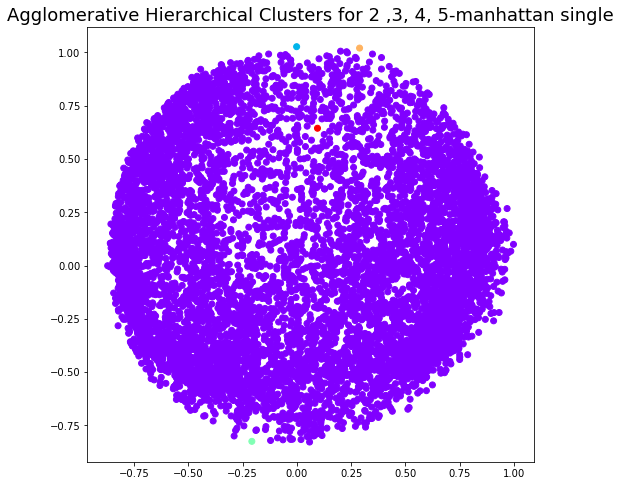

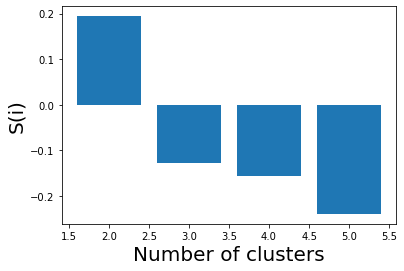

Silhouette score for 2,3,4,5 [0.1942264355772353, -0.12726321213941025, -0.1569646530754337, -0.2397495914825107]


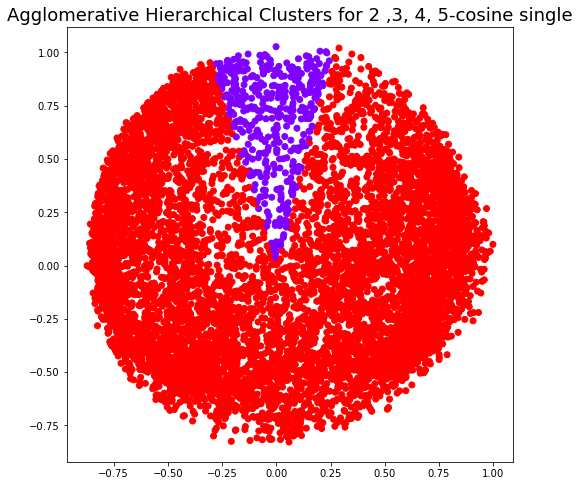

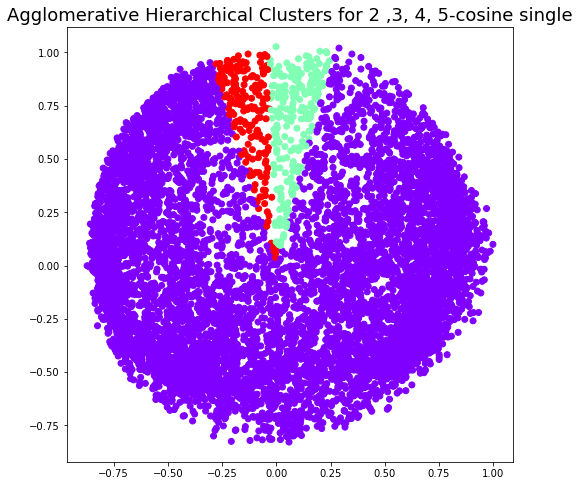

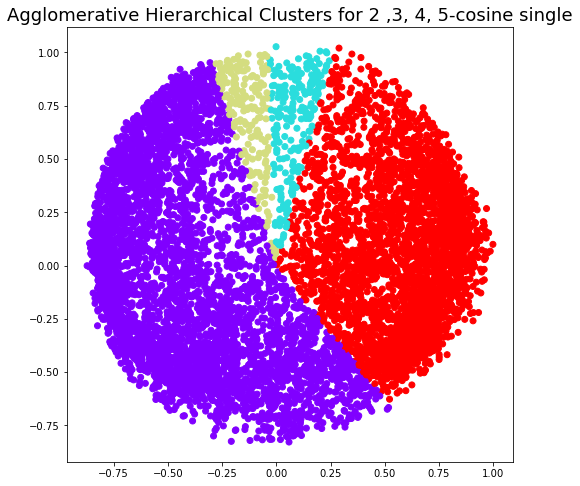

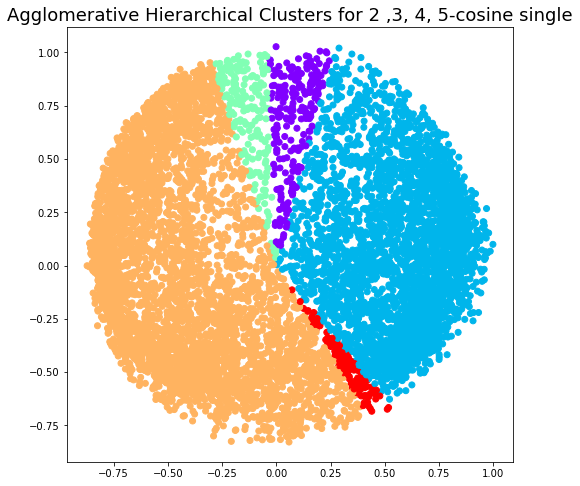

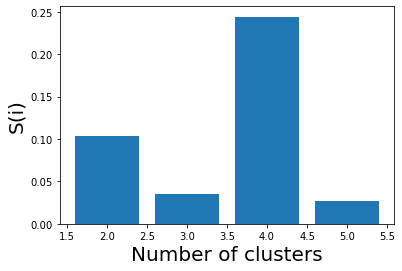

Silhouette score for 2,3,4,5 [0.10370255515163285, 0.03487777528361516, 0.2442179988830374, 0.027133600817458168]


In [27]:
#  Find clustering @ different linkages , distances and clusters 
silhouette_scores = []
linkages = ['complete' ,'average','single']
distance = ['euclidean' , 'manhattan', 'cosine']
clusters = [ 2 ,3,4,5]
for val in linkages:
    for dis in distance:
       for clus in clusters:
         sc = cluster(clus,dis,val)
         silhouette_scores.append(sc)
            
# Plotting a bar graph to compare the results
       plt.bar(clusters, silhouette_scores)
       plt.xlabel('Number of clusters', fontsize = 20)
       plt.ylabel('S(i)', fontsize = 20)
       plt.show()
       print('Silhouette score for 2,3,4,5', silhouette_scores)
       silhouette_scores = []   

### DB SCAN

In [28]:
db = DBSCAN(eps=0.09,min_samples=120)

In [29]:
model = db.fit(df_pca)
labels=model.labels_
sample_cores=np.zeros_like(labels,dtype=bool)

In [30]:
sample_cores[db.core_sample_indices_]=True
print('silhouette_score', silhouette_score(df_pca, model.fit_predict(df_pca)))

silhouette_score 0.24063702965695907


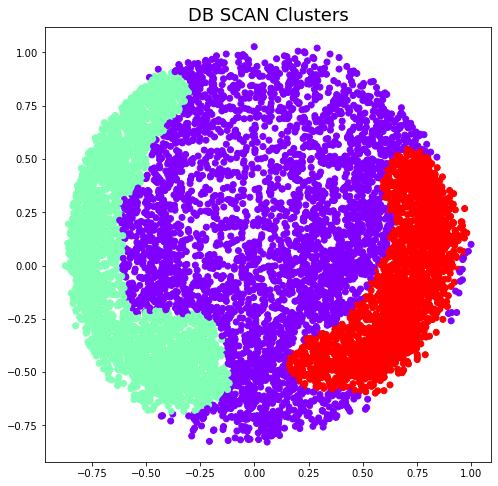

In [31]:
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c =labels, cmap ='rainbow')
plt.title("DB SCAN Clusters", fontsize=18)
plt.show()

silhouette_score 0.1848446268737573


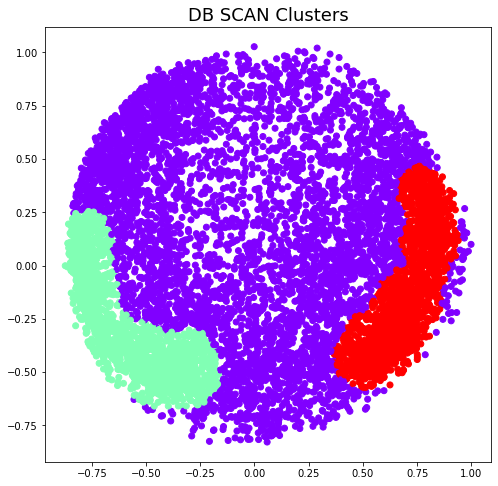

In [32]:
db = DBSCAN(eps=0.08,min_samples=120)
model = db.fit(df_pca)
labels=model.labels_
sample_cores=np.zeros_like(labels,dtype=bool)

sample_cores[db.core_sample_indices_]=True

print('silhouette_score', silhouette_score(df_pca, model.fit_predict(df_pca)))
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c =labels, cmap ='rainbow')
plt.title("DB SCAN Clusters", fontsize=18)
plt.show()

### Cluster Interpretation

### Agglomerative Clustering<br>
We worked with 
* Different linkages i.e average , single , complete 
* different similarity i.e euclidean , manhattan, cosine  
* different clusters 2,3,4,5 
<br> Best results are obtained : cosine similarity @ linkage single @ cluster - silhouette score 0.43.</b>

### DB SCAN <br>
* best clustering obtained @ eps=0.90 and min samples = 120. 
* Number of clusters obtained is 3.  silhouette score - 0.22. 

#### Overall Best Clustering is observed in Agglomerative Clustering</b>